# Intro

Gradient descent is one of the main algorithms of model optimization and also the common way to optimize neural networks (DL). 

*
> $ J(θ)=∑J$i$(θ) $
>
> $ θ:=θ−η∇$θ$J(θ)=θ−η∑∇J$i$(θ)$

*
>The basic idea is :  Gradient descent can minimize cost function J(θ)
parameterized by a model’s parameters θ by updating the parameters in the opposite direction of the gradient of the cost function ∇J(θ) to the parameters.


The learning rate η determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the cost function J(θ) downhill until we reach a valley.




In [41]:
#cd analysis/ML_/doc/



Demo how Gradient descent works : 

1. Get gradient of curve (cost function), 
2. Then move the current value to next smaller value
   (the moving step is determined by "learning rate η  "),
3. Until reaching local minimum of the given function.
4. Finish model parameter tuning 
   (find the combination of parameters make cost function J(θ) minimum)






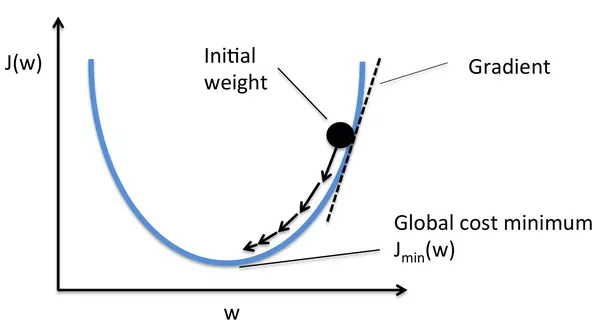

In [5]:
# credit : 
from IPython.display import Image
print ("""

Demo how Gradient descent works : 

1. Get gradient of curve (cost function), 
2. Then move the current value to next smaller value
   (the moving step is determined by "learning rate η  "),
3. Until reaching local minimum of the given function.
4. Finish model parameter tuning 
   (find the combination of parameters make cost function J(θ) minimum)



""")
Image(filename='gradient_descent.png')

# Approaches :

In this notebook, we demo 3  main algorithms of Gradient descent

*
> Batch Gradient Descent
- dev 


*
> Stochastic Gradient Descent
- dev 

*
> Mini-batch Gradient Descent
- dev 


# Ref :

https://am207.github.io/2017/wiki/gradientdescent.html


In [14]:
# analysis library
import pandas as pd, numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

# ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_regression

Populating the interactive namespace from numpy and matplotlib


## 0) Data prepare 

In [29]:
# help functions 


def make_sample_data():
    # sklearn sample data generator
    # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
    x, y = make_regression(n_samples = 300, 
                           n_features=1, 
                           n_informative=1, 
                           noise=30,
                           random_state=110)
    # flatten() : Return a copy of the array collapsed into one dimension.
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html
    x = x.flatten()
    slope, intercept, _,_,_ = stats.linregress(x,y)
    best_fit = np.vectorize(lambda x: x * slope + intercept)
    return x,y,grid,best_fit

In [31]:
# get sample data 
x,y,grid,best_fit = make_sample_data()

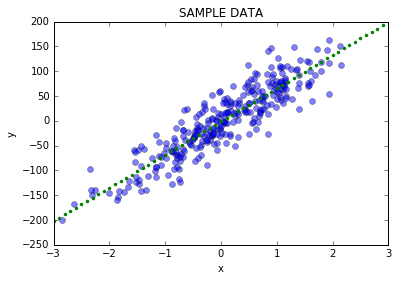

In [34]:
# visualize sample data 
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SAMPLE DATA')
plt.plot(grid,best_fit(grid), '.')

## 1) Batch gradient descent

In [42]:
"""
pseudo code  :

for i in range(loop):
    

"""


def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size # number of data points
    theta = theta_init
    history = [] # to store all thetas
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [8]:
gradient_descent

<function __main__.gradient_descent>

In [16]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


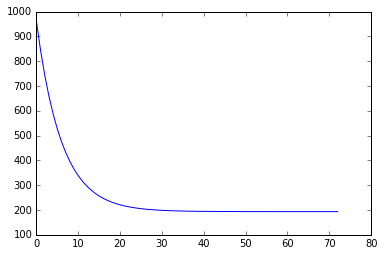

In [17]:
plt.plot(range(len(cost)), cost);

ValueError: x and y must have same first dimension

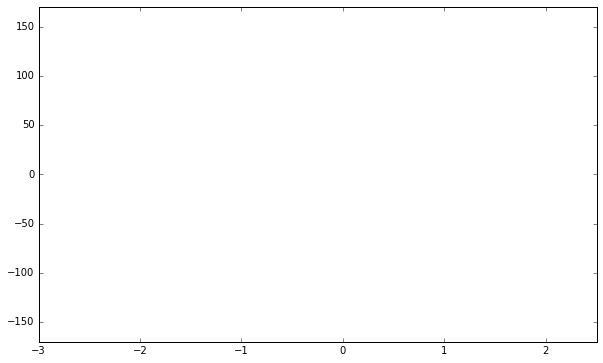

In [40]:

def init():
    line.set_data([], [])
    return line,

def animate(i):
    ys = preds[i]
    line.set_data(xaug[:, 1], ys)
    return line,



fig = plt.figure(figsize=(10,6))
ax = plt.axes(xlim=(-3, 2.5), ylim=(-170, 170))
ax.plot(xaug[:,1],y, 'o')
line, = ax.plot([], [], lw=2)
plt.plot(xaug[:,1], best_fit(xaug[:,1]), 'k-', color = "r")

